In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm import tqdm

In [44]:
round0_dir = "datasets/round_0/combined/round0_avg_dens_grad_lap_dipole_stdScl.csv"
round1_dir = "datasets/round_1/combined/round1_avg_dens_grad_lap_targs_stdScl.csv"
cum_dir = "datasets/round_1/combined/comb_avg_dens_grad_lap_dipole_stdScl.csv"

# Round 0

In [81]:
df = pd.read_csv(round0_dir)
X_train, X_test, y_train, y_test = train_test_split(df.values[:, :-1], df.values[:, -1], test_size=0.1)

In [83]:
df.corr()

,d100,g100,l100,d200,g200,l200,d300,g300,l300,d400,g400,l400,d500,g500,l500,Dipole
d100,1.000000,0.832133,-0.684697,1.000000,0.832133,-0.684697,1.000000,0.832133,-0.684697,1.000000,0.832133,-0.684697,1.000000,0.832133,-0.684697,0.447509
g100,0.832133,1.000000,-0.879320,0.832133,1.000000,-0.879320,0.832133,1.000000,-0.879320,0.832133,1.000000,-0.879320,0.832133,1.000000,-0.879320,0.441762
l100,-0.684697,-0.879320,1.000000,-0.684697,-0.879320,1.000000,-0.684697,-0.879320,1.000000,-0.684697,-0.879320,1.000000,-0.684697,-0.879320,1.000000,-0.321040
d200,1.000000,0.832133,-0.684697,1.000000,0.832133,-0.684697,1.000000,0.832133,-0.684697,1.000000,0.832133,-0.684697,1.000000,0.832133,-0.684697,0.447509
g200,0.832133,1.000000,-0.879320,0.832133,1.000000,-0.879320,0.832133,1.000000,-0.879320,0.832133,1.000000,-0.879320,0.832133,1.000000,-0.879320,0.441762
l200,-0.684697,-0.879320,1.000000,-0.684697,-0.879320,1.000000,-0.684697,-0.879320,1.000000,-0.684697,-0.879320,1.000000,-0.684697,-0.879320,1.000000,-0.321040
d300,1.000000,0.832133,-0.684697,1.000000,0.832133,-0.684697,1.000000,0.832133,-0.684697,1.000000,0.832133,-0.684697,1.000000,0.832133,-0.684697,0.447509
g300,0.832133,1.000000,-0.879320,0.832133,1.000000,-0.879320,0.832133,1.000000,-0.879320,0.832133,1.000000,-0.879320,0.832133,1.000000,-0.879320,0.441762
l300,-0.684697,-0.879320,1.000000,-0.684697,-0.879320,1.000000,-0.684697,-0.879320,1.000000,-0.684697,-0.879320,1.000000,-0.684697,-0.879320,1.000000,-0.321040
d400,1.000000,0.832133,-0.684697,1.000000,0.832133,-0.684697,1.000000,0.832133,-0.684697,1.000000,0.832133,-0.684697,1.000000,0.832133,-0.684697,0.447509


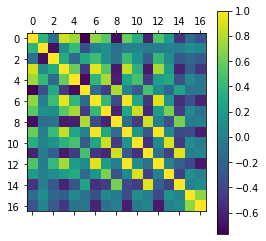

In [80]:
plt.matshow(df.corr())
plt.colorbar()
plt.show()

### Linear

In [49]:
reg = LinearRegression().fit(X_train, y_train)
preds = reg.predict(X_test)

In [50]:
mean_squared_error(preds, y_test)

0.013548252129281632

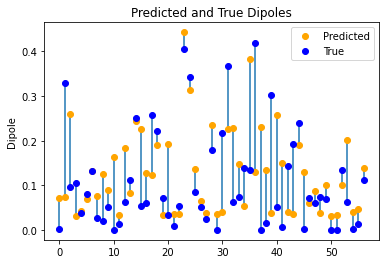

In [51]:
plt.vlines(list(range(len(preds))), preds, y_test)
plt.title("Predicted and True Dipoles")
plt.plot(preds, 'o', color = "orange", label = 'Predicted')
plt.plot(y_test, 'o', color = "blue", label = 'True')
plt.ylabel("Dipole")
plt.legend()
plt.show()

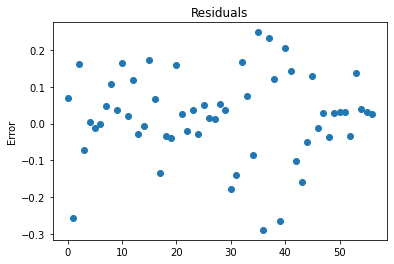

In [52]:
plt.plot(preds-y_test, 'o', label = "residuals")
plt.title("Residuals")
plt.ylabel("Error")
plt.show()

### SVR

In [53]:
reg = SVR().fit(X_train, y_train)
preds = reg.predict(X_test)

In [54]:
mean_squared_error(preds, y_test)

0.015783022826278834

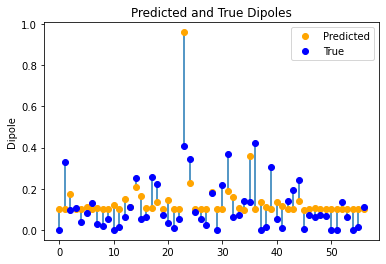

In [55]:
plt.vlines(list(range(len(preds))), preds, y_test)
plt.title("Predicted and True Dipoles")
plt.plot(preds, 'o', color = "orange", label = 'Predicted')
plt.plot(y_test, 'o', color = "blue", label = 'True')
plt.ylabel("Dipole")
plt.legend()
plt.show()

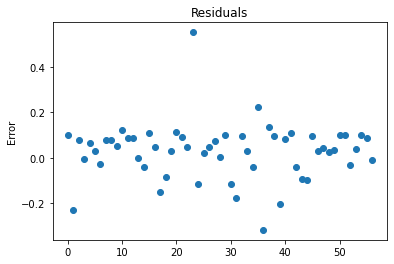

In [56]:
plt.plot(preds-y_test, 'o', label = "residuals")
plt.title("Residuals")
plt.ylabel("Error")
plt.show()

### Random Forest

In [57]:
reg = RandomForestRegressor().fit(X_train, y_train)
preds = reg.predict(X_test)

In [58]:
mean_squared_error(preds, y_test)

0.013985627466275885

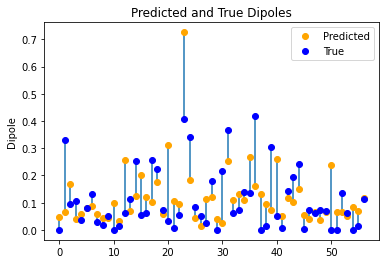

In [59]:
plt.vlines(list(range(len(preds))), preds, y_test)
plt.title("Predicted and True Dipoles")
plt.plot(preds, 'o', color = "orange", label = 'Predicted')
plt.plot(y_test, 'o', color = "blue", label = 'True')
plt.ylabel("Dipole")
plt.legend()
plt.show()

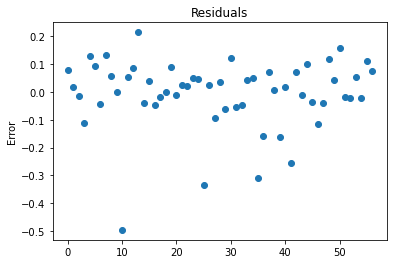

In [17]:
plt.plot(preds-y_test, 'o', label = "residuals")
plt.title("Residuals")
plt.ylabel("Error")
plt.show()

### Bag of SVM

In [172]:
# boostrap
n = len(X_train)
bootstraps = [(X_train, y_train)]
for _ in range(100):
    boot_ix = np.random.choice(n, n, replace=True)
    X_boot = X_train[boot_ix]
    y_boot = y_train[boot_ix]
    bootstraps.append((X_boot, y_boot))

svrs = []
for X, y in bootstraps:
    svr_boot = SVR()
    
    # scale and fit to data
    svr_boot.fit(X, y)
    
    # save scaler and fit specific to bootstrap
    svrs.append(svr_boot)

bag_of_preds = []
for i, regr in enumerate(svrs):
    df_cpy = X_test.copy()
    preds = regr.predict(df_cpy)
    bag_of_preds.append(preds)

In [62]:
# MSE and residuals

In [173]:
preds = np.array(bag_of_preds).mean(axis=0)
mean_squared_error(preds, y_test)

0.010964082312449289

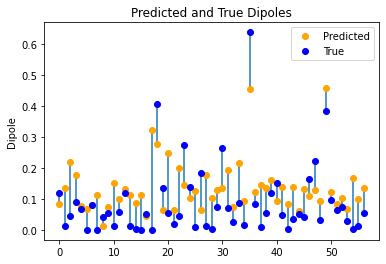

In [174]:
plt.vlines(list(range(len(preds))), preds, y_test)
plt.title("Predicted and True Dipoles")
plt.plot(preds, 'o', color = "orange", label = 'Predicted')
plt.plot(y_test, 'o', color = "blue", label = 'True')
plt.ylabel("Dipole")
plt.legend()
plt.show()

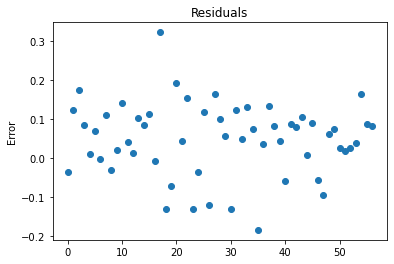

In [175]:
plt.plot(preds-y_test, 'o', label = "residuals")
plt.title("Residuals")
plt.ylabel("Error")
plt.show()

# Round 1

In [65]:
df = pd.read_csv(round1_dir)
X_train, X_test, y_train, y_test = train_test_split(df.values[:, :-2], df.values[:, -2], test_size=0.1)

### Linear

In [66]:
reg = LinearRegression().fit(X_train, y_train)
preds = reg.predict(X_test)

(array([960., 458., 289., 104.,  13.,   0.,   1.,   0.,   0.,   1.]),
 array([  5. ,  40.4,  75.8, 111.2, 146.6, 182. , 217.4, 252.8, 288.2,
        323.6, 359. ]),
 <BarContainer object of 10 artists>)

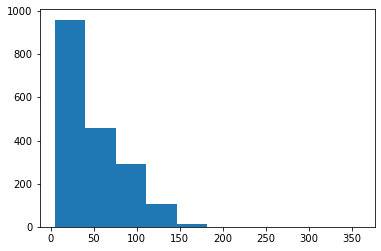

In [67]:
elong_vals = df.values[:, -1]
plt.hist(df.values[:, -1])

In [68]:
np.sqrt(870)/(np.max(elong_vals) - np.min(elong_vals))

0.08332136273306567

In [69]:
mean_squared_error(preds, y_test)

0.029796801914755026

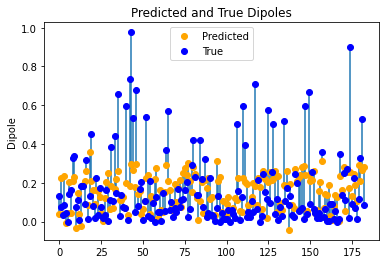

In [70]:
plt.vlines(list(range(len(preds))), preds, y_test)
plt.title("Predicted and True Dipoles")
plt.plot(preds, 'o', color = "orange", label = 'Predicted')
plt.plot(y_test, 'o', color = "blue", label = 'True')
plt.ylabel("Dipole")
plt.legend()
plt.show()

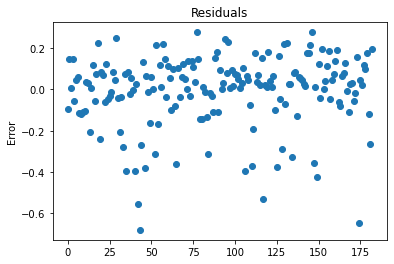

In [71]:
plt.plot(preds-y_test, 'o', label = "residuals")
plt.title("Residuals")
plt.ylabel("Error")
plt.show()

### SVR

In [72]:
reg = SVR().fit(X_train, y_train)
preds = reg.predict(X_test)

In [73]:
mean_squared_error(preds, y_test)

0.029690788188694122

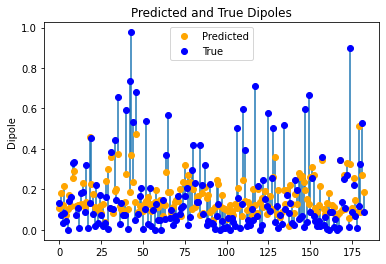

In [74]:
plt.vlines(list(range(len(preds))), preds, y_test)
plt.title("Predicted and True Dipoles")
plt.plot(preds, 'o', color = "orange", label = 'Predicted')
plt.plot(y_test, 'o', color = "blue", label = 'True')
plt.ylabel("Dipole")
plt.legend()
plt.show()

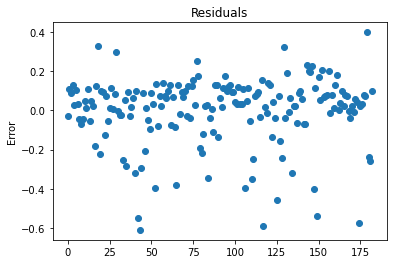

In [75]:
plt.plot(preds-y_test, 'o', label = "residuals")
plt.title("Residuals")
plt.ylabel("Error")
plt.show()

### Random Forest

In [76]:
reg = RandomForestRegressor().fit(X_train, y_train)
preds = reg.predict(X_test)

In [77]:
mean_squared_error(preds, y_test)

0.028414651252804252

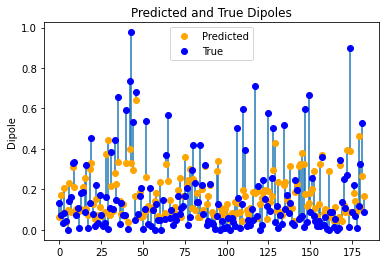

In [78]:
plt.vlines(list(range(len(preds))), preds, y_test)
plt.title("Predicted and True Dipoles")
plt.plot(preds, 'o', color = "orange", label = 'Predicted')
plt.plot(y_test, 'o', color = "blue", label = 'True')
plt.ylabel("Dipole")
plt.legend()
plt.show()

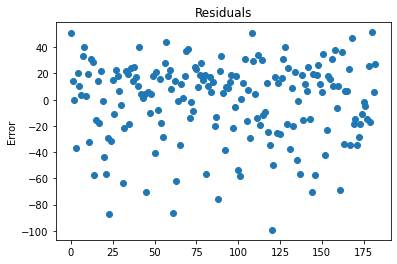

In [157]:
plt.plot(preds-y_test, 'o', label = "residuals")
plt.title("Residuals")
plt.ylabel("Error")
plt.show()

### Bag of SVM

In [211]:
# boostrap
n = len(X_train)
bootstraps = [(X_train, y_train)]
for _ in range(100):
    boot_ix = np.random.choice(n, n, replace=True)
    X_boot = X_train[boot_ix]
    y_boot = y_train[boot_ix]
    bootstraps.append((X_boot, y_boot))

svrs = []
for X, y in bootstraps:
    svr_boot = SVR()
    
    # scale and fit to data
    svr_boot.fit(X, y)
    
    # save scaler and fit specific to bootstrap
    svrs.append(svr_boot)

bag_of_preds = []
for i, regr in enumerate(svrs):
    df_cpy = X_test.copy()
    preds = regr.predict(df_cpy)
    bag_of_preds.append(preds)

In [212]:
# MSE and residuals

In [213]:
preds = np.array(bag_of_preds).mean(axis=0)
mean_squared_error(preds, y_test)

0.02571223886350183

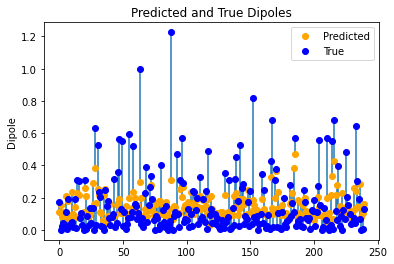

In [214]:
plt.vlines(list(range(len(preds))), preds, y_test)
plt.title("Predicted and True Dipoles")
plt.plot(preds, 'o', color = "orange", label = 'Predicted')
plt.plot(y_test, 'o', color = "blue", label = 'True')
plt.ylabel("Dipole")
plt.legend()
plt.show()

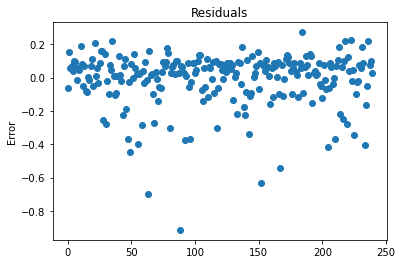

In [215]:
plt.plot(preds-y_test, 'o', label = "residuals")
plt.title("Residuals")
plt.ylabel("Error")
plt.show()

# Cumulative

In [162]:
df = pd.read_csv("datasets/round_1/combined/combined_avg_sigma_window_stdScl.csv")
X_train, X_test, y_train, y_test = train_test_split(df.values[:, :-1], df.values[:, -1], test_size=0.1)

In [126]:
df = pd.read_csv("datasets/round_1/combined/combined_avg_sigma_window_stdScl.csv")
df_noncorr = df[["d200", "g100", "g200", "g300", "g400", "g500", "Dipole"]]

df_noncorr.corr()

X_train, X_test, y_train, y_test = train_test_split(df_noncorr.values[:, :-1], df_noncorr.values[:, -1], test_size=0.1)

df = pd.read_csv("datasets/round_1/combined/combined_pool_dens_grad_dipole_stdScl.csv")
X_train, X_test, y_train, y_test = train_test_split(df.values[:, :-1], df.values[:, -1], test_size=0.1)

In [164]:
np.sqrt(0.03)/(np.max(df.values[:, -1])-np.min(df.values[:, -1]))

0.11973088951093136

In [127]:
df_noncorr.corr()

,d200,g100,g200,g300,g400,g500,Dipole
d200,1.000000,0.164082,0.087585,0.063600,0.040958,0.024940,-0.033160
g100,0.164082,1.000000,0.413631,0.117112,0.024624,0.007992,0.073812
g200,0.087585,0.413631,1.000000,0.769289,0.487567,0.307412,0.053443
g300,0.063600,0.117112,0.769289,1.000000,0.868715,0.646252,0.058137
g400,0.040958,0.024624,0.487567,0.868715,1.000000,0.909703,0.094883
g500,0.024940,0.007992,0.307412,0.646252,0.909703,1.000000,0.116308
Dipole,-0.033160,0.073812,0.053443,0.058137,0.094883,0.116308,1.000000


In [128]:
X_train, X_test, y_train, y_test = train_test_split(df_noncorr.values[:, :-1], df_noncorr.values[:, -1], test_size=0.1)

### Linear

In [129]:
reg = LinearRegression().fit(X_train, y_train)
preds = reg.predict(X_test)

In [130]:
mean_squared_error(preds, y_test)

0.03431794982838614

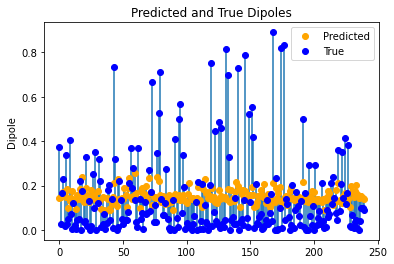

In [131]:
plt.vlines(list(range(len(preds))), preds, y_test)
plt.title("Predicted and True Dipoles")
plt.plot(preds, 'o', color = "orange", label = 'Predicted')
plt.plot(y_test, 'o', color = "blue", label = 'True')
plt.ylabel("Dipole")
plt.legend()
plt.show()

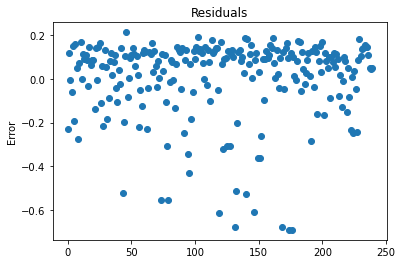

In [132]:
plt.plot(preds-y_test, 'o', label = "residuals")
plt.title("Residuals")
plt.ylabel("Error")
plt.show()

### SVR

In [133]:
reg = SVR().fit(X_train, y_train)
preds = reg.predict(X_test)

In [134]:
mean_squared_error(preds, y_test)

0.031402780793170125

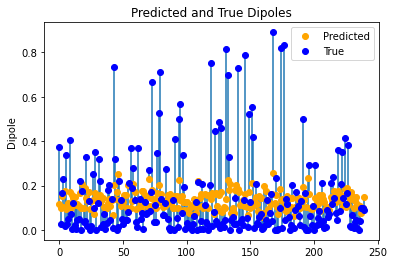

In [135]:
plt.vlines(list(range(len(preds))), preds, y_test)
plt.title("Predicted and True Dipoles")
plt.plot(preds, 'o', color = "orange", label = 'Predicted')
plt.plot(y_test, 'o', color = "blue", label = 'True')
plt.ylabel("Dipole")
plt.legend()
plt.show()

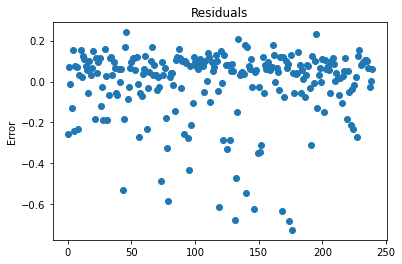

In [136]:
plt.plot(preds-y_test, 'o', label = "residuals")
plt.title("Residuals")
plt.ylabel("Error")
plt.show()

### Random Forest

In [137]:
reg = RandomForestRegressor().fit(X_train, y_train)
preds = reg.predict(X_test)

In [138]:
mean_squared_error(preds, y_test)

0.031741304029658336

In [112]:
reg.feature_importances_

array([0.26707955, 0.14635124, 0.17366503, 0.13149735, 0.13252124,
       0.1488856 ])

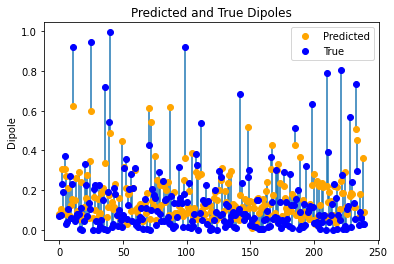

In [114]:
plt.vlines(list(range(len(preds))), preds, y_test)
plt.title("Predicted and True Dipoles")
plt.plot(preds, 'o', color = "orange", label = 'Predicted')
plt.plot(y_test, 'o', color = "blue", label = 'True')
plt.ylabel("Dipole")
plt.legend()
plt.show()

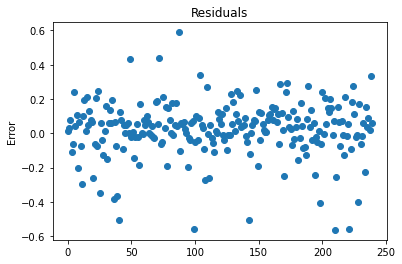

In [115]:
plt.plot(preds-y_test, 'o', label = "residuals")
plt.title("Residuals")
plt.ylabel("Error")
plt.show()

# XG Boost

### Bag of SVM

In [68]:
# boostrap
n = len(X_train)
bootstraps = [(X_train, y_train)]
for _ in range(100):
    boot_ix = np.random.choice(n, n, replace=True)
    X_boot = X_train[boot_ix]
    y_boot = y_train[boot_ix]
    bootstraps.append((X_boot, y_boot))

svrs = []
for X, y in bootstraps:
    svr_boot = SVR()
    
    # scale and fit to data
    svr_boot.fit(X, y)
    
    # save scaler and fit specific to bootstrap
    svrs.append(svr_boot)

bag_of_preds = []
for i, regr in enumerate(svrs):
    df_cpy = X_test.copy()
    preds = regr.predict(df_cpy)
    bag_of_preds.append(preds)

In [69]:
# MSE and residuals

In [70]:
preds = np.array(bag_of_preds).mean(axis=0)
mean_squared_error(preds, y_test)

0.05958156090781603

In [ ]:
plt.vlines(list(range(len(preds))), preds, y_test)
plt.title("Predicted and True Dipoles")
plt.plot(preds, 'o', color = "orange", label = 'Predicted')
plt.plot(y_test, 'o', color = "blue", label = 'True')
plt.ylabel("Dipole")
plt.legend()
plt.show()

In [ ]:
plt.plot(preds-y_test, 'o', label = "residuals")
plt.title("Residuals")
plt.ylabel("Error")
plt.show()